<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# **Guía de Trabajo: Árboles de Decisión en Machine Learning**  

---

# **1. Conceptos Teóricos**  

## **1.1 ¿Qué es un Árbol de Decisión?**  
Un **árbol de decisión** es un modelo de aprendizaje supervisado que se utiliza tanto para **clasificación** como para **regresión**. Su estructura es similar a un diagrama de flujo donde cada nodo representa una pregunta basada en los datos y las ramas conducen a diferentes respuestas hasta llegar a una predicción.  

<img src=https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/05/decision-tree-terminology.jpg width=500>

1. **Nodo Raíz (Root Node)** 🌳  
   Es el nodo inicial del árbol que representa el conjunto completo de datos antes de dividirse.

2. **Nodo Interno (Internal Node)** 📍  
   Son los nodos que representan una característica sobre la cual se hace una división (split).

3. **Hoja (Leaf Node o Terminal Node)** 🍃  
   Son los nodos finales del árbol que contienen la predicción (categoría o valor).


4. **Profundidad del Árbol (Tree Depth)** 📏  
   Número máximo de niveles en el árbol. Un árbol profundo puede sobreajustar, mientras que uno muy poco profundo puede infraajustar.


📌 **Ejemplo:**  Riesgo de tener una enfermedad cardiovascular

<img src=https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png          width=500>



Si queremos predecir si es buena idea ir a practicar un deporte basandonos en las condiciones climaticas, el árbol podría verse así:  

<img src=https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/05/decision-tree-example-1024x576.jpg          width=500>




---

📌 **Pregunta para Reflexión:**  
- ¿Cómo influye la profundidad del árbol en su capacidad de generalización?  

---

R:

### 🔍 **Criterios para División en Árboles de Decisión**  

Cuando entrenamos un árbol de decisión, debemos elegir en cada paso **qué atributo usar para dividir** los datos. Para ello, usamos **criterios de división**, que miden qué tan buena es una partición en función de la "pureza" de los grupos resultantes.

Los principales criterios son:

1. **Índice de Gini (Gini Impurity)** 🧮  
   - Mide la **impureza** de un nodo, es decir, cuán mezcladas están las clases.  
   - Si un nodo tiene solo una clase, su Gini es **0** (puro).  
   - Si está completamente mezclado entre clases, su Gini se acerca a **0.5** (para dos clases).  

2. **Entropía y Ganancia de Información** 🔥  
   - La **entropía** mide el **desorden** en un conjunto de datos.  
   - La **ganancia de información** mide cuánto reduce la entropía después de una división.  

3. **Reducción de Varianza (para regresión)** 📉  
   - Se usa en problemas de regresión y mide cuánto se reduce la dispersión de los valores después de una división.

---

# 🚀 **Algoritmo empleando el Índice de Gini**  

### **Entrada:**
- Un conjunto de datos con **m muestras** y **m características**.
- Una variable objetivo categórica (por ejemplo, "Compra: Sí/No").

### **Paso 1: Calcular el Índice de Gini del Nodo Raíz**
- Contar la proporción de cada clase en el conjunto de datos original.
- Usar la fórmula:

  $
  Gini = 1 - \sum P_i^2
  $

  donde $ P_i $ es la proporción de la clase $ i $.

---

### **Paso 2: Para Cada Característica, Evaluar el Índice de Gini Tras la División**
1. Para cada característica $ X $:  
   - Dividir el conjunto de datos en subgrupos según los valores de $ X$.
   - Para cada subgrupo, calcular su índice de Gini usando la fórmula.

2. **Calcular el Gini Ponderado** después de la división:

   $
   Gini_{X} = \sum \left( \frac{|S_j|}{|S|} \times Gini_j \right)
   $

   donde:
   - $|S_j| $ es el número de muestras en el subgrupo $ j $.
   - $ |S| $ es el número total de muestras antes de dividir.
   - $ Gini_j $ es el índice de Gini del subgrupo $ j $.

---

### **Paso 3: Seleccionar la Mejor Característica**
- Escoger la característica que **minimiza el Índice de Gini Ponderado**.
- Si la reducción de Gini no es significativa, se detiene la división.

---

### **Paso 4: Repetir el Proceso en Cada Subgrupo**
- Para cada subgrupo creado, repetir desde **Paso 1** hasta que:
  - Los nodos sean puros (Gini = 0).
  - Se alcance un criterio de parada (ej. profundidad máxima del árbol).

---

# 📊 **Ejemplo Aplicado Paso a Paso**
Usaremos el mismo conjunto de datos:

| ID | Edad   | Salario | Compra (Target) |
|----|--------|--------|---------------|
| 1  | Joven  | Bajo   | No            |
| 2  | Joven  | Medio  | No            |
| 3  | Joven  | Alto   | Sí            |
| 4  | Joven  | Bajo   | No            |
| 5  | Adulto | Medio  | Sí            |
| 6  | Adulto | Alto   | Sí            |
| 7  | Adulto  | Bajo   | Sí            |
| 8  | Adulto  | Medio  | Sí            |
| 9  | Adulto  | Alto   | Sí            |

--- 

### **Paso 1: Calcular el Índice de Gini del Nodo Raíz**
- **Total de ejemplos:** 9  
- **Clase "Sí" (Compra):** 6  
- **Clase "No" (No compra):** 3  

$
Gini_{padre} = 1 - \left(\left(\frac{6}{9}\right)^2 + \left(\frac{3}{9}\right)^2\right)
$

$
= 1 - (0.444 + 0.111) = 0.4444
$

---

### **Paso 2: Evaluar el Índice de Gini tras dividir por cada característica**

#### **Opción 1: Dividir por Edad**
- **Joven (4 ejemplos):** (3 No, 1 Sí)  
- **Adulto (5 ejemplos):** (0 No, 5 Sí)  


📌 **Cálculo de Gini para cada grupo:**

$
Gini_{joven} = 1 - \left(\left(\frac{3}{4}\right)^2 + \left(\frac{1}{4}\right)^2\right) = 0.375
$

$
Gini_{adulto} = 1 - \left(\left(\frac{5}{5}\right)^2 \right) = 0.0
$

📌 **Índice de Gini ponderado tras dividir por Edad**:

$
Gini_{Edad} = \frac{5}{9} \times 0.0 + \frac{4}{9} \times 0.375 = 0.16666
$

---

#### **Opción 2: Dividir por Salario**
- **Bajo (3 ejemplos):** (2 No, 1 Sí)  
- **Medio (3 ejemplos):** (1 No, 2 Sí)  
- **Alto (3 ejemplos):** (0 No, 3 Sí)  

📌 **Cálculo de Gini para cada grupo:**
Todos tienen el mismo valor:

$
Gini_{bajo} = 0.4444, \quad Gini_{medio} = 0.4444, \quad Gini_{alto} = 0.0
$

📌 **Índice de Gini ponderado tras dividir por Salario**:

$
Gini_{Salario} = \frac{3}{9} \times 0.4444 + \frac{3}{9} \times 0.4444 + \frac{3}{9} \times 0.0 = 0.293333
$

---

### **Paso 3: Seleccionar la Mejor Característica**
- **Gini después de dividir por Edad = 0.1666**  
- **Gini después de dividir por Salario = 0.29333**  

✅ **La mejor característica para dividir primero es "Edad"** porque tiene el **menor índice de Gini**.

---

### **Paso 4: Continuar con las Divisiones**
1. Primero dividimos por **Edad**.
2. Luego, en cada grupo, aplicamos el mismo proceso para elegir la mejor característica restante.
3. Repetimos hasta que cada nodo sea puro.

---


In [82]:
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'Edad': ['Joven', 'Joven', 'Joven', 'Joven', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto'],
    'Salario': ['Bajo', 'Medio', 'Alto', 'Bajo', 'Medio', 'Alto', 'Bajo', 'Medio', 'Alto'],
    'Compra': ['No', 'No', 'Sí', 'No', 'Sí', 'Sí', 'Sí', 'Sí', 'Sí']  # Variable objetivo
})

print("📊 Conjunto de Datos:")
print(data)
clases = data["Compra"].unique()

📊 Conjunto de Datos:
     Edad Salario Compra
0   Joven    Bajo     No
1   Joven   Medio     No
2   Joven    Alto     Sí
3   Joven    Bajo     No
4  Adulto   Medio     Sí
5  Adulto    Alto     Sí
6  Adulto    Bajo     Sí
7  Adulto   Medio     Sí
8  Adulto    Alto     Sí


In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas en números
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Separar características (X) y variable objetivo (y)
X = data[['Edad', 'Salario']]
y = data['Compra']

X

,Edad,Salario
0,1,1
1,1,2
2,1,0
3,1,1
4,0,2
5,0,0
6,0,1
7,0,2
8,0,0


In [74]:
def gini_score(y):
    """Calcula el índice de Gini de una lista de etiquetas"""
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

def gini_index(feature, X, y):
    """Calcula el índice de Gini ponderado para una característica"""
    unique_values = X[feature].unique()
    total_samples = len(y)
    gini_weighted = 0.0

    for value in unique_values:
        subset_y = y[X[feature] == value]  # Obtener las etiquetas de la partición
        gini_value = gini_score(subset_y)
        weight = len(subset_y) / total_samples
        gini_weighted += weight * gini_value  # Sumar Gini ponderado

    return gini_weighted

In [76]:
best_feature = None
best_gini = float('inf')

for feature in X.columns:
    gini = gini_index(feature, X, y)
    print(f"🔍 Gini ponderado para '{feature}': {gini:.4f}")
    
    if gini < best_gini:
        best_gini = gini
        best_feature = feature

print(f"\n✅ Mejor característica para dividir: '{best_feature}' con Gini {best_gini:.4f}")

🔍 Gini ponderado para 'Edad': 0.1667
🔍 Gini ponderado para 'Salario': 0.2963

✅ Mejor característica para dividir: 'Edad' con Gini 0.1667


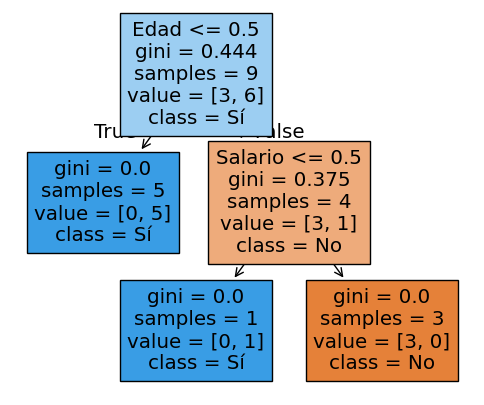

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
X = data[['Edad', 'Salario']]
y = data['Compra']

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=10)
clf.fit(X, y)

plt.figure(figsize=(6, 5))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clases)
plt.show()

## **1.3 Árboles de Clasificación vs. Árboles de Regresión**  
Los **árboles de clasificación** predicen categorías (por ejemplo, "spam" o "no spam"), mientras que los **árboles de regresión** predicen valores continuos (por ejemplo, el precio de una casa).  

📌 **Ejemplo:**  
- **Clasificación**: Diagnóstico de una enfermedad (sano/enfermo).  
- **Regresión**: Predicción del precio de un automóvil según sus características.  

📌 **Pregunta para Reflexión:**  
- ¿Podría usarse un árbol de clasificación para problemas de regresión? ¿Por qué?  

---

R:

## **1.5 Sobreajuste y Estrategias de Poda**  
Un árbol **demasiado profundo** puede memorizar los datos de entrenamiento y no generalizar bien.  

### **Soluciones:**  
- **Poda preventiva:** Limita la profundidad máxima del árbol (`max_depth`).  
- **Poda post-entrenamiento:** Elimina ramas irrelevantes tras el entrenamiento.  
- **Mínimo de muestras por nodo (`min_samples_split`)**: Define cuántas muestras se requieren para dividir un nodo.  

📌 **Pregunta para Reflexión:**  
- ¿Cómo afectaría establecer un `max_depth` demasiado pequeño?  

---

# **2. Implementación en Python con Scikit-Learn**  

A continuación, implementaremos un árbol de decisión para clasificar flores del dataset **Iris**.  


Precisión del modelo: 1.00


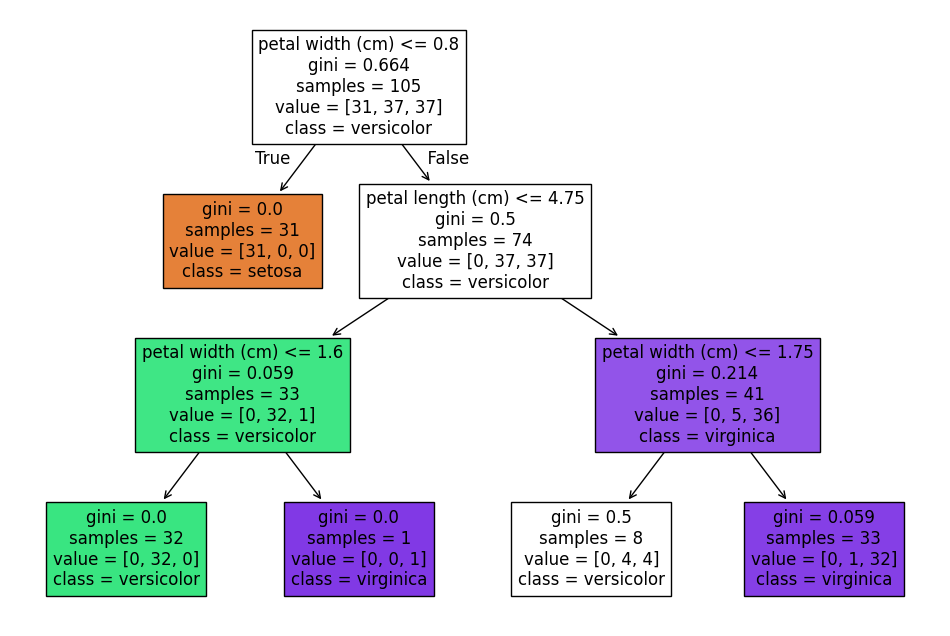

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=10)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

✏️ **Ejercicio:**  
- Cambia `criterion="entropy"` y observa la diferencia.  
- Modifica `max_depth` y analiza su impacto.  

# **3. Comparación con Otros Algoritmos**  

Compararemos el árbol con **KNN** y **Regresión Logística**.  


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Modelos
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression(max_iter=200)

# Entrenar y evaluar KNN
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# Entrenar y evaluar Regresión Logística
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

# Comparación de resultados
print(f"Precisión Árbol de Decisión: {accuracy}")
print(f"Precisión KNN: {knn_acc}")
print(f"Precisión Regresión Logística: {logreg_acc}")


Precisión Árbol de Decisión: 1.0
Precisión KNN: 1.0
Precisión Regresión Logística: 1.0



✏️ **Ejercicio:**  
- ¿Cuál modelo tiene mejor precisión?  
- ¿Cómo cambia el rendimiento si ajustamos `max_depth` en el árbol?  


---

# **4. Ajuste de Hiperparámetros con GridSearchCV**  

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)